Analysing the performance of students and predicting the grades

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
stud_info= pd.read_csv('C:\MTech\SEM1\ML\Project\student-mat.csv')    # Read the dataset
stud_info.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
print('Total number of students:',len(stud_info))

Total number of students: 395


In [4]:
stud_info['G3'].describe()   # getting stats information of G3 that is labelled ouput

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [5]:
stud_info.info()    # getting Information of all features in teh dataset in terms of datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
stud_info.columns    # Columns names or features

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
stud_info.describe()    # Dataset description info  of all the features

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
stud_info.isnull().any()    # To check any null values present in dataset

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [9]:
#import cufflinks as cf
#cf.go_offline()

<AxesSubplot:>

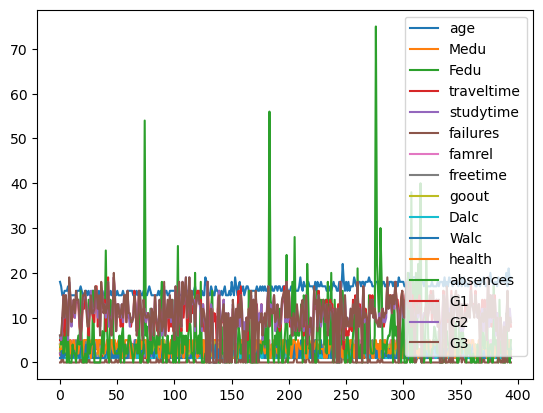

In [10]:
stud_info.plot()    # Plot for the all attributes

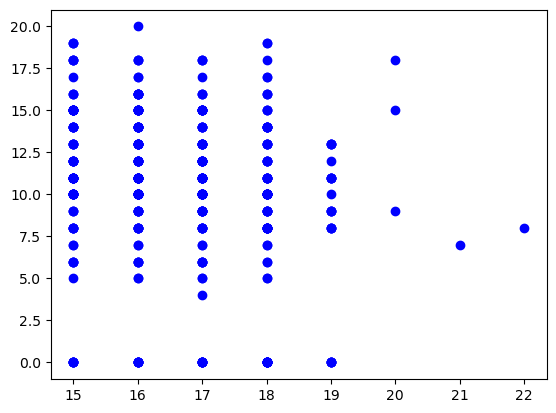

In [11]:
plt.scatter(stud_info.age,stud_info.G3 , c ="blue")
plt.show()

<AxesSubplot:>

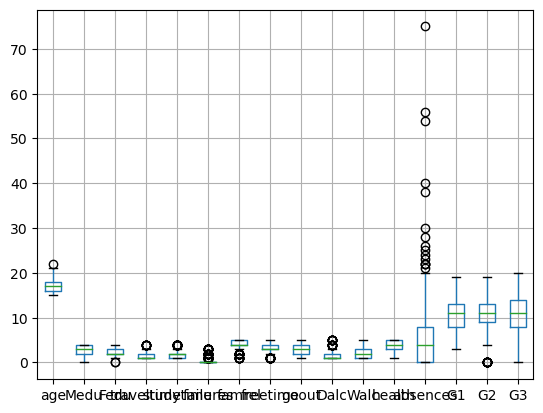

In [12]:
stud_info.boxplot()

(array([0.48101266, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01265823, 0.        , 0.        , 0.        , 0.        ,
        0.08860759, 0.        , 0.        , 0.        , 0.        ,
        0.18987342, 0.        , 0.        , 0.        , 0.        ,
        0.11392405, 0.        , 0.        , 0.        , 0.        ,
        0.40506329, 0.        , 0.        , 0.        , 0.        ,
        0.35443038, 0.        , 0.        , 0.        , 0.        ,
        0.70886076, 0.        , 0.        , 0.        , 0.        ,
        0.59493671, 0.        , 0.        , 0.        , 0.        ,
        0.39240506, 0.        , 0.        , 0.        , 0.        ,
        0.39240506, 0.        , 0.        , 0.        , 0.        ,
        0.34177215, 0.        , 0.        , 0.  

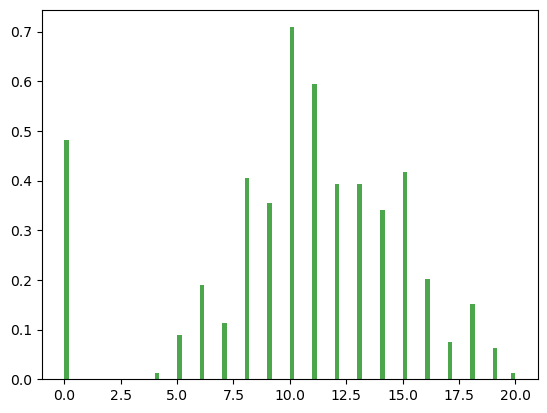

In [13]:
plt.hist(stud_info.G3, 100, 
                            density = 1, 
                            color ='green',
                            alpha = 0.7)

## Student's Sex 

In [14]:
f_students = len(stud_info[stud_info['sex'] == 'F'])    # Number of female students
print('Number of female students:',f_students)
m_students = len(stud_info[stud_info['sex'] == 'M'])    # Number of male students
print('Number of male students:',m_students)

Number of female students: 208
Number of male students: 187


<AxesSubplot:xlabel='sex', ylabel='count'>

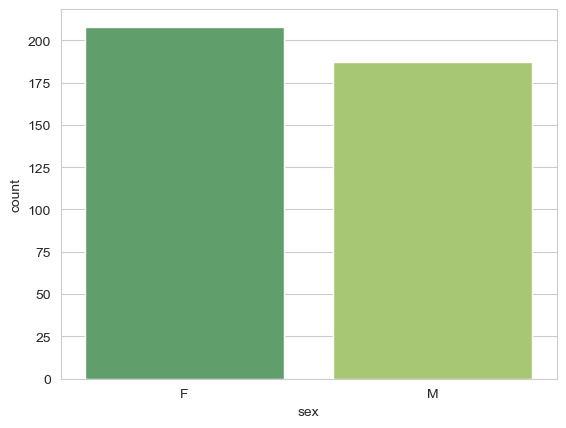

In [15]:
sns.set_style('whitegrid')    # male & female student representaion on countplot shows not much difference
sns.countplot(x='sex',data=stud_info,palette='summer')

# Age of Students

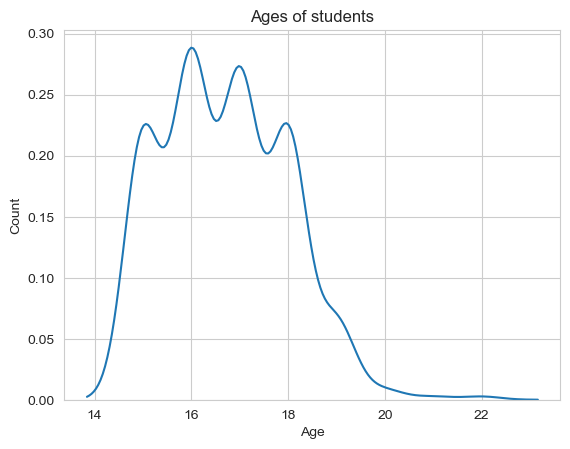

In [16]:
b = sns.kdeplot(stud_info['age'])    # Kernel Density Estimations for age of students
b.axes.set_title('Ages of students')
b.set_xlabel('Age')
b.set_ylabel('Count')
plt.show()

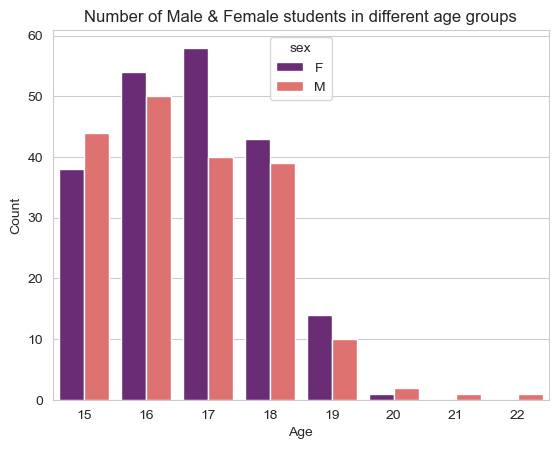

In [17]:
b = sns.countplot(x='age',hue='sex', data=stud_info, palette='magma')
b.axes.set_title('Number of Male & Female students in different age groups')
b.set_xlabel("Age")
b.set_ylabel("Count")
plt.show()

- The student age seems to be ranging from 15-19, where gender distribution is almost even in each age group.
- The age group above 19 may be outliers, year back students or droupouts from schools

In [18]:
u_students = len(stud_info[stud_info['address'] == 'U'])    # Number of urban areas students
print('Number of Urban students:',u_students)
r_students = len(stud_info[stud_info['address'] == 'R'])    # Number of rural areas students
print('Number of Rural students:',r_students)

Number of Urban students: 307
Number of Rural students: 88


<AxesSubplot:xlabel='address', ylabel='count'>

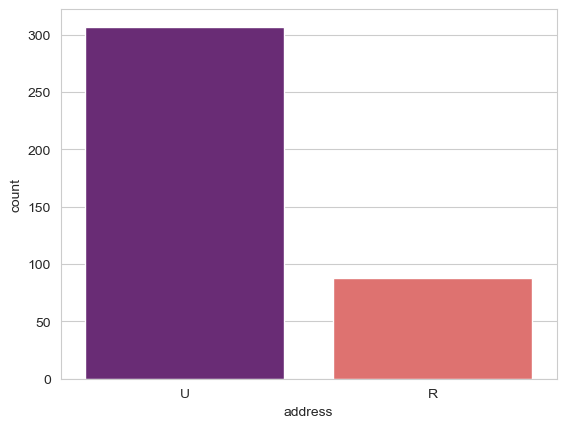

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='address',data=stud_info,palette='magma')    # urban & rural representaion on countplot

- Approximately we acn say 78% students come from urban region and 22% from rural region.

<AxesSubplot:xlabel='address', ylabel='count'>

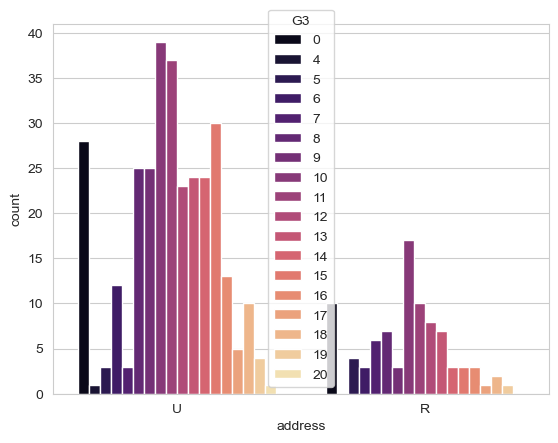

In [20]:
sns.countplot(x='address',hue='G3',data=stud_info,palette='magma')

 ## EDA

Let's check if age has an impact on the G3

Text(0.5, 1.0, 'Age vs Final Grade')

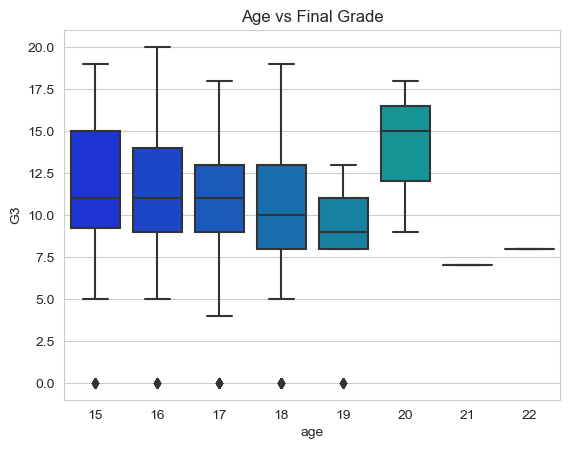

In [21]:
b= sns.boxplot(x='age', y='G3',data=stud_info,palette='winter')
b.axes.set_title('Age vs Final Grade')

- The above plot shows that the median of the three age groups(15,16,17) are similar. We can see the skewness of age group 19.. Age group 20 seems to score highest grades among all.

C:\Users\Haji\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Haji\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Haji\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Haji\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Age VS final grade')

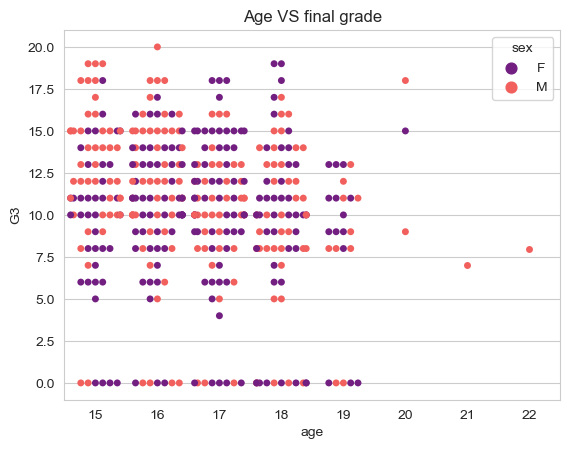

In [22]:
b = sns.swarmplot(x='age', y='G3',hue='sex', data=stud_info,palette='magma')
b.axes.set_title('Age VS final grade')

#Urban students and rural students and their performance

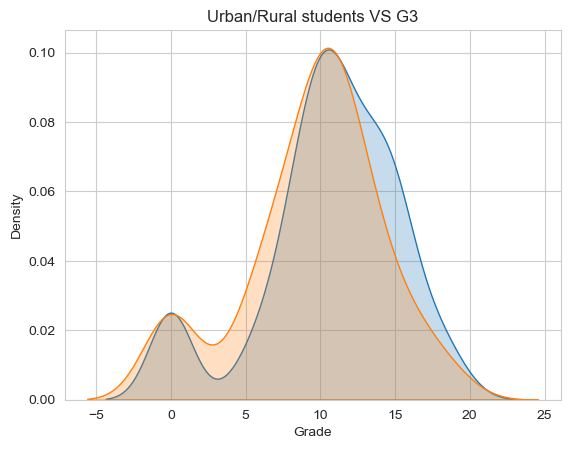

In [23]:
# Grade distribution by address
sns.kdeplot(stud_info.loc[stud_info['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(stud_info.loc[stud_info['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Urban/Rural students VS G3')
plt.xlabel('Grade');
plt.ylabel('Density')
plt.show()

- The above graph shows that there is not much difference between the grades based on  whether the student is from rural or urban area

In [24]:
stud_info.corr()['G3'].sort_values() # corelation between other features and G3 in ascending order

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

Using labelEncoder we can encode the categorical values

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
stud_info.iloc[:,0]=le.fit_transform(stud_info.iloc[:,0])
stud_info.iloc[:,1]=le.fit_transform(stud_info.iloc[:,1])
stud_info.iloc[:,3]=le.fit_transform(stud_info.iloc[:,3])
stud_info.iloc[:,4]=le.fit_transform(stud_info.iloc[:,4])
stud_info.iloc[:,5]=le.fit_transform(stud_info.iloc[:,5])
stud_info.iloc[:,8]=le.fit_transform(stud_info.iloc[:,8])
stud_info.iloc[:,9]=le.fit_transform(stud_info.iloc[:,9])
stud_info.iloc[:,10]=le.fit_transform(stud_info.iloc[:,10])
stud_info.iloc[:,11]=le.fit_transform(stud_info.iloc[:,11])
stud_info.iloc[:,15]=le.fit_transform(stud_info.iloc[:,15])
stud_info.iloc[:,16]=le.fit_transform(stud_info.iloc[:,16])
stud_info.iloc[:,17]=le.fit_transform(stud_info.iloc[:,17])
stud_info.iloc[:,18]=le.fit_transform(stud_info.iloc[:,18])
stud_info.iloc[:,19]=le.fit_transform(stud_info.iloc[:,19])
stud_info.iloc[:,20]=le.fit_transform(stud_info.iloc[:,20])
stud_info.iloc[:,21]=le.fit_transform(stud_info.iloc[:,21])
stud_info.iloc[:,22]=le.fit_transform(stud_info.iloc[:,22])

In [26]:
stud_info.head() # data updated with encoded values

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [27]:
stud_info.corr()['G3'].sort_values()    #  encoded data to find Correlation wrt G3

failures     -0.360415
age          -0.161579
goout        -0.132791
romantic     -0.129970
traveltime   -0.117142
schoolsup    -0.082788
guardian     -0.070109
health       -0.061335
Pstatus      -0.058009
Dalc         -0.054660
Walc         -0.051939
school       -0.045017
famsup       -0.039157
freetime      0.011307
activities    0.016100
absences      0.034247
Fjob          0.042286
famrel        0.051363
nursery       0.051568
famsize       0.081407
studytime     0.097820
internet      0.098483
paid          0.101996
Mjob          0.102082
sex           0.103456
address       0.105756
reason        0.121994
Fedu          0.152457
higher        0.182465
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [28]:
# drop the school and grade columns as we already know that they are highly correlated
stud_info = stud_info.drop(['school', 'G1', 'G2'], axis='columns')

 We want to find other factors affect the final grade G3.

In [29]:
# Find correlations with the G3 using updated dataset without school, G1 and G3
most_correlated = stud_info.corr().abs()['G3'].sort_values(ascending=False)

# Lets consider the top 8 most correlation features with Grade
most_correlated = most_correlated[:9]
most_correlated

G3          1.000000
failures    0.360415
Medu        0.217147
higher      0.182465
age         0.161579
Fedu        0.152457
goout       0.132791
romantic    0.129970
reason      0.121994
Name: G3, dtype: float64

In [30]:
stud_info = stud_info.loc[:, most_correlated.index]
stud_info.head()

,G3,failures,Medu,higher,age,Fedu,goout,romantic,reason
0,6,0,4,1,18,4,4,0,0
1,6,0,1,1,17,1,3,0,0
2,10,3,1,1,15,1,2,0,2
3,15,0,4,1,15,2,2,1,1
4,10,0,3,1,16,3,2,0,1


Let us consider the failure attribute

C:\Users\Haji\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Previous Failures vs Final Grade(G3)')

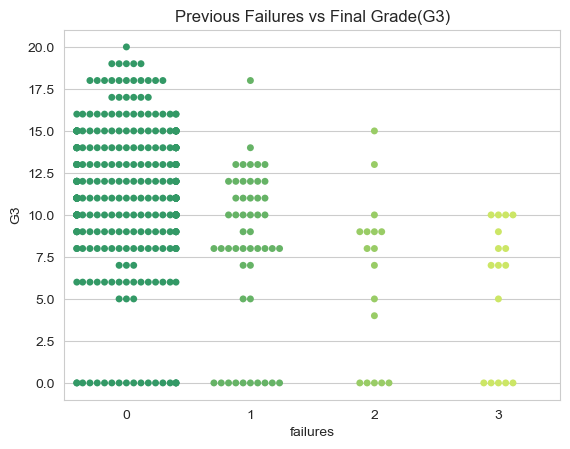

In [31]:
b = sns.swarmplot(x=stud_info['failures'],y=stud_info['G3'],palette='summer')
b.axes.set_title('Previous Failures vs Final Grade(G3)')

Student with less previous failures usually score higher or good values

Family Education includes father education and mother education  ( Fedu + Medu )

C:\Users\Haji\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Haji\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Haji\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Haji\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Haji\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot b

Text(0.5, 1.0, 'Family Education vs G3')

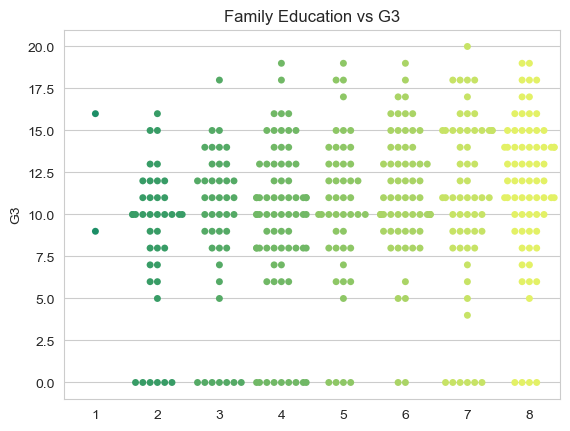

In [32]:
fa_edu = stud_info['Fedu'] + stud_info['Medu']
b = sns.swarmplot(x=fa_edu,y=stud_info['G3'],palette='summer')
b.axes.set_title('Family Education vs G3')

It is observed that educated families result in higher grades for students

Higher education VS G3

Text(0.5, 1.0, 'Higher Education vs Final Grade(G3)')

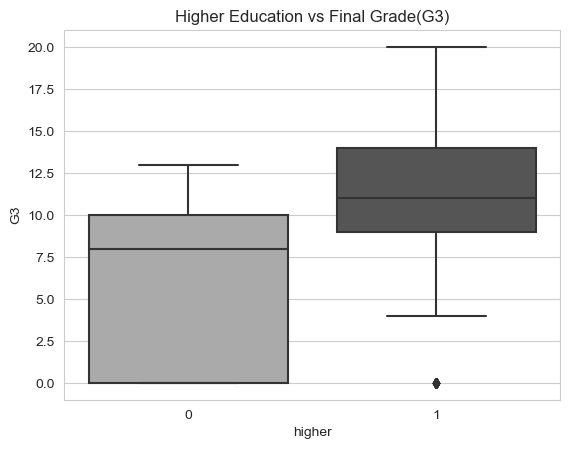

In [33]:
b = sns.boxplot(x=stud_info['higher'],y=stud_info['G3'],palette='binary')
b.axes.set_title('Higher Education vs Final Grade(G3)')

It is observed that Students who wish to go for higher studies score more grades

going out attribute (goout) VS G3

Text(0.5, 1.0, 'Go Out vs Final Grade(G3)')

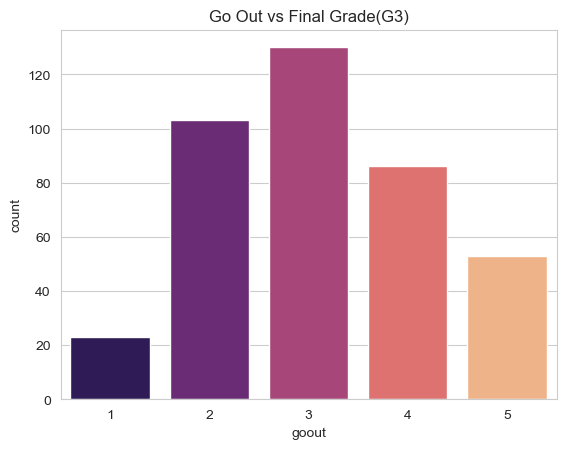

In [34]:
b = sns.countplot(x=stud_info['goout'],palette='magma')
b.axes.set_title('Go Out vs Final Grade(G3)')

It is observed that  students have an average score when it comes to going out with friends.

C:\Users\Haji\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Haji\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Go Out vs Final Grade(G3)')

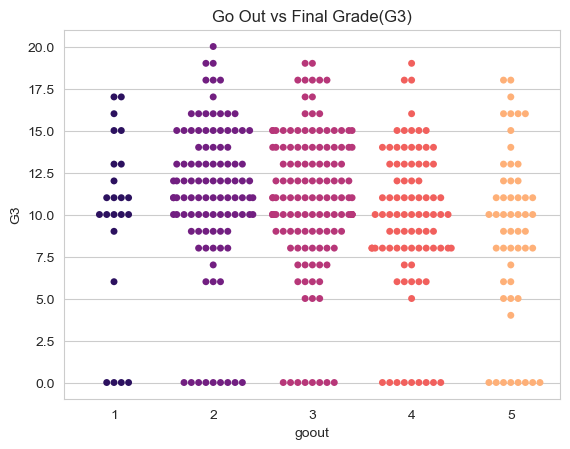

In [35]:
b = sns.swarmplot(x=stud_info['goout'],y=stud_info['G3'],palette='magma')
b.axes.set_title('Go Out vs Final Grade(G3)')

It is observed that students  going out a lot score less

Romantic Vs G3

C:\Users\Haji\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Romantic Relationship vs Final Grade(G3)')

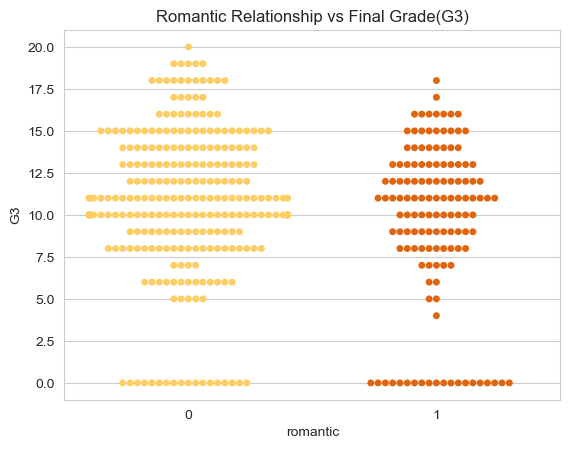

In [36]:
b = sns.swarmplot(x=stud_info['romantic'],y=stud_info['G3'],palette='YlOrBr')
b.axes.set_title('Romantic Relationship vs Final Grade(G3)')

It is observed that the students with no romantic relationship ie in gragh 0,  score higher

Reason VS G3

Text(0.5, 1.0, 'Reason vs Students Count')

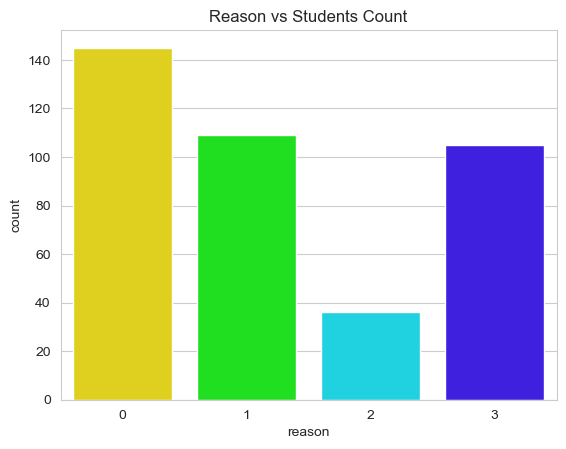

In [37]:
b = sns.countplot(x='reason',data=stud_info,palette='gist_rainbow')    # Reason to choose this school
b.axes.set_title('Reason vs Students Count')

C:\Users\Haji\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Haji\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Reason vs Final grade')

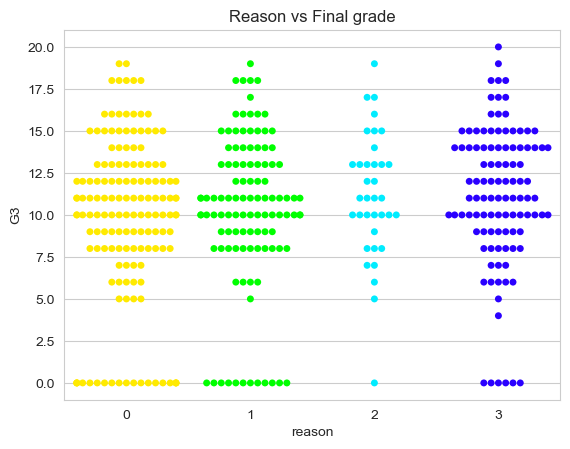

In [38]:
b = sns.swarmplot(x='reason', y='G3', data=stud_info,palette='gist_rainbow')
b.axes.set_title('Reason vs Final grade')

It is observed that the students have an equally distributed average score when it comes to reason attribute.

# ML Algorithms (Linear Regression, Elastic net , Random Forest Regressor) 

In [39]:
# ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

import scipy

In [40]:
accuracy_val = pd.DataFrame()

In [41]:
# splitting the data into training and testing data (75% and 25%)
X_train, X_test, y_train, y_test = train_test_split(stud_info[['failures','Medu','higher','age','Fedu','goout','romantic','reason']], stud_info['G3'], test_size = 0.25, random_state=42)

In [42]:
X_train.head()


,failures,Medu,higher,age,Fedu,goout,romantic,reason
16,0,4,1,16,4,3,0,3
66,0,4,1,15,4,3,1,3
211,0,4,1,17,4,5,1,1
7,0,4,1,17,4,4,0,1
19,0,4,1,16,3,3,0,1


In [43]:
y_train.head()

16     14
66     12
211    13
7       6
19     10
Name: G3, dtype: int64

Lets check for RMSE and MAE

In [44]:
from sklearn import metrics
model1 = LinearRegression()
model1.fit(X_train, y_train)
predictions = model1.predict(X_test)
mae = np.mean(abs(predictions - y_test))
rmse_1 = np.sqrt(np.mean((predictions - y_test) ** 2))
print("MAE=",mae,"RMSE=",rmse_1)


MAE= 3.485115080196929 RMSE= 4.432596719875849


In [45]:
     
model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
model2.fit(X_train, y_train)
predictions = model2.predict(X_test)
mae = np.mean(abs(predictions - y_test))
rmse_e = np.sqrt(np.mean((predictions - y_test) ** 2))
print("MAE=",mae,"RMSE=",rmse_e)


MAE= 3.6080509608753917 RMSE= 4.573273805278278


In [46]:
model3 = RandomForestRegressor(n_estimators=100)
model3.fit(X_train, y_train)
predictions = model3.predict(X_test)
mae = np.mean(abs(predictions - y_test))
rmse_r = np.sqrt(np.mean((predictions - y_test) ** 2))
print("MAE=",mae,"RMSE=",rmse_r)


MAE= 3.687684704184705 RMSE= 4.6131984353552005


In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
score_RFC =clf.score(X_test, y_test)
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Training set score: 0.9291
Test set score: 0.1616
              precision    recall  f1-score   support

           0       0.22      0.22      0.22         9
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         2
           8       0.40      0.25      0.31         8
           9       0.40      0.29      0.33         7
          10       0.24      0.38      0.29        13
          11       0.00      0.00      0.00         6
          12       0.12      0.14      0.13         7
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         8
          15       0.25      0.27      0.26        11
          16       0.17      0.25      0.20         4
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         3
          20       0.00      0.

C:\Users\Haji\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Haji\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Haji\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Haji\anaconda3\lib\site-packages\sklearn\metrics\_classif

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
clf_tree.fit(X_train, y_train)
y_pred_gini = clf_tree.predict(X_test)

print('Training set score: {:.4f}'.format(clf_tree.score(X_train, y_train)))
score_DTC =clf_tree.score(X_test, y_test)
print('Test set score: {:.4f}'.format(clf_tree.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gini))


Training set score: 0.2736
Test set score: 0.0808
              precision    recall  f1-score   support

           0       0.31      0.44      0.36         9
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         2
           8       0.25      0.12      0.17         8
           9       0.00      0.00      0.00         7
          10       0.11      0.15      0.13        13
          11       0.02      0.17      0.04         6
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         3

    accuracy                  

C:\Users\Haji\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Haji\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Haji\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
df_score = pd.DataFrame(index= ['LR', 'RFR', 'ER', 'RFC', 'DTC'])
df_score['RMSE']= [rmse_1,rmse_e,rmse_r,score_RFC*100,score_DTC*100]
df_score

,RMSE
LR,4.432597
RFR,4.573274
ER,4.613198
RFC,16.161616
DTC,8.080808


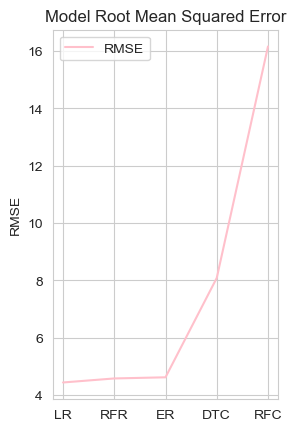

In [50]:
# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
df_score.sort_values('RMSE', ascending = True).plot.line(y = 'RMSE', color = 'pink', ax = ax)
plt.title('Model Root Mean Squared Error') 
plt.ylabel('RMSE')

plt.show()







In [51]:
df_score_cl = pd.DataFrame(index= ['RFC', 'DTC'])
df_score_cl['Score']= [(score_RFC*100),(score_DTC*100)]
df_score_cl

,Score
RFC,16.161616
DTC,8.080808


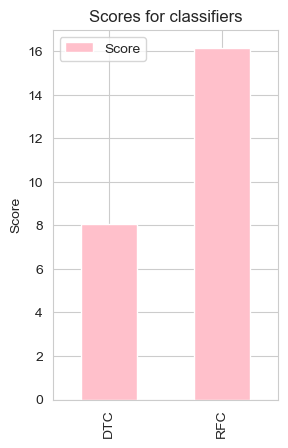

In [52]:
ax = plt.subplot(1, 2, 2)
df_score_cl.sort_values('Score', ascending = True).plot.bar(y = 'Score', color = 'pink', ax = ax)
plt.title('Scores for classifiers') 
plt.ylabel('Score')

plt.show()

Conclusion: Mean Absolute Error & Root Mean Squared Error helps us to conclude that the linear regression is performing the best.Considering the Classifier accuracy is more for Random Forest Classifier.